# **Summer School Sustainable Digital Finance** - Introduction to Python - 2
Author: Nicole Bellert - bell@zhaw.ch


---------------------------------------------


In this exercise, we will analyze stock market data from Yahoo Finance.

In [1]:
#!pip install yfinance

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

**Section:** Fetching Stock Data with YFinance

In [3]:
# Assign a ticker
apple = yf.Ticker("AAPL")
apple

yfinance.Ticker object <AAPL>

In [4]:
# Get data
startDate = "2020-01-01"
endDate = "2020-12-31"
apple_df = apple.history(start=startDate, end=endDate)
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.545897,72.598899,71.292311,72.538521,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,71.765659,72.594048,71.608677,71.833282,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,70.954181,72.444313,70.703005,72.405670,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.415337,72.671341,71.845369,72.065147,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,71.768079,73.526295,71.768079,73.224403,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,128.776191,129.039267,127.431519,127.606918,88223700,0.0,0.0
2020-12-24 00:00:00-05:00,127.957667,130.042874,127.743299,128.591019,54930100,0.0,0.0
2020-12-28 00:00:00-05:00,130.559319,133.823537,130.091599,133.190186,124486200,0.0,0.0


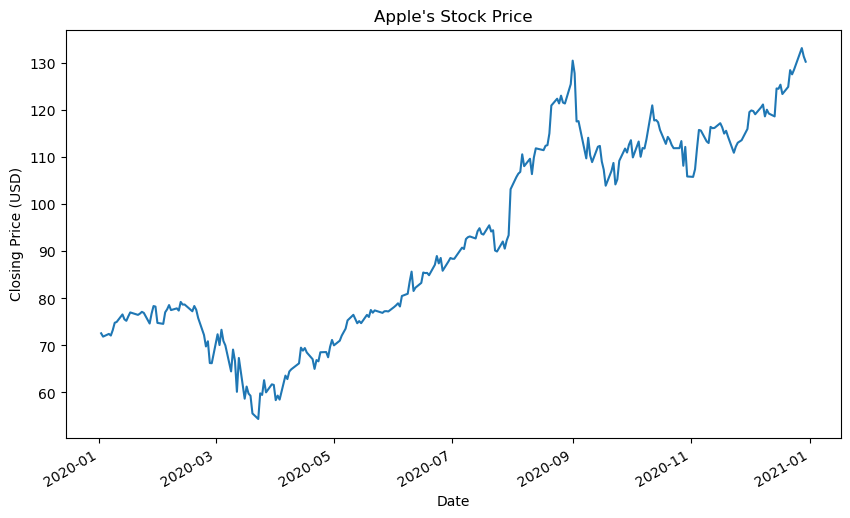

In [5]:
# Plots
apple_df["Close"].plot(figsize=(10, 6), title="Apple's Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()

In [6]:
# Fetching Multiple Stocks
multi_data = yf.download(["AAPL", "MSFT"], start="2020-01-01", end="2021-01-01")
multi_data.head()

C:\Users\bell\AppData\Local\Temp\ipykernel_28196\3515432545.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  multi_data = yf.download(["AAPL", "MSFT"], start="2020-01-01", end="2021-01-01")
[*********************100%***********************]  2 of 2 completed


Price           Close                   High                    Low  \
Ticker           AAPL        MSFT       AAPL        MSFT       AAPL   
Date                                                                  
2020-01-02  72.538521  152.791138  72.598899  152.895777  71.292311   
2020-01-03  71.833305  150.888626  72.594071  152.153802  71.608700   
2020-01-06  72.405685  151.278610  72.444328  151.345205  70.703020   
2020-01-07  72.065147  149.899292  72.671341  151.887418  71.845369   
2020-01-08  73.224396  152.286957  73.526287  152.962357  71.768071   

Price                        Open                 Volume            
Ticker            MSFT       AAPL        MSFT       AAPL      MSFT  
Date                                                                
2020-01-02  150.612762  71.545897  151.040826  135480400  22622100  
2020-01-03  150.355924  71.765682  150.603260  146322800  21116200  
2020-01-06  148.881435  70.954195  149.423659  118387200  20813700  
2020-01-07  149.651970  72.415337  151.554487  108872000  21634100  
2020-01-08  150.251264  71.768071  151.183494  132079200  27746500

In [7]:
# Interval-based Data Retrieval
# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]')
# Note: minutes and horly data have a time limit!
apple_weekly = yf.download("AAPL", start="2020-01-01", end="2021-01-01", interval="1wk")
apple_weekly.head(10)

C:\Users\bell\AppData\Local\Temp\ipykernel_28196\2236710235.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_weekly = yf.download("AAPL", start="2020-01-01", end="2021-01-01", interval="1wk")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-01,72.065170,72.671364,70.703031,71.545911,509062400
2020-01-08,75.516365,76.697368,71.768082,71.768082,726318800
2020-01-15,76.455856,77.047559,74.760428,75.315913,479412400
2020-01-22,76.726357,78.088488,73.632572,76.941299,677016000
2020-01-29,77.006493,79.180112,72.990127,78.358968,852965600
2020-02-05,77.190056,78.544949,75.798944,78.134374,545608400
2020-02-12,77.225578,79.215529,76.162815,77.823532,441122800
2020-02-19,69.740273,78.593377,69.268208,77.467677,776972800


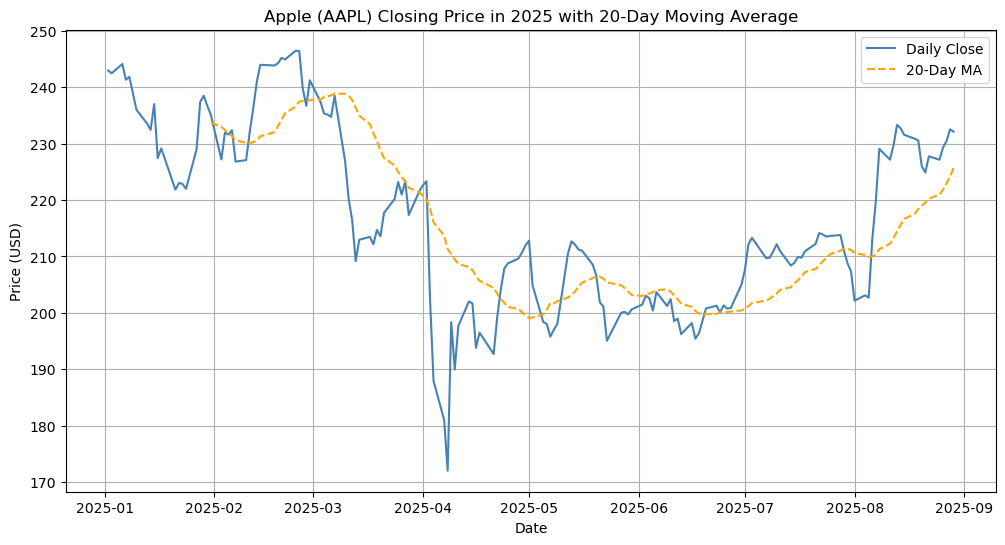

In [10]:
# Adding Moving Average indicators
apple = yf.Ticker("AAPL")
apple_df = apple.history(start="2025-01-01", end="2025-12-31")

# Add a 20-day moving average
apple_df["MA20"] = apple_df["Close"].rolling(window=20).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(apple_df["Close"], label="Daily Close", color="steelblue")
plt.plot(apple_df["MA20"], label="20-Day MA", color="orange", linestyle="--")
plt.title("Apple (AAPL) Closing Price in 2025 with 20-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

#### Interpretation:
- The **closing price** curve shows Apple’s performance across 2025.
- The **20-day moving average** smooths short-term fluctuations and highlights medium-term trends.
- This type of analysis is commonly used in **technical analysis** and **trading strategy development**. But, could be used in regression analysis as well!

### Load MICROSOFT (MSFT) stock prices.

In [11]:
ticker = "MSFT"
msft = yf.Ticker(ticker)
df = msft.history(start="2010-12-31", interval="1d")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31 00:00:00-05:00,21.248347,21.340068,21.118412,21.332424,24752000,0.0,0.0
2011-01-03 00:00:00-05:00,21.439422,21.538786,21.340060,21.385920,53443800,0.0,0.0
2011-01-04 00:00:00-05:00,21.355354,21.531149,21.286564,21.470003,54405600,0.0,0.0
2011-01-05 00:00:00-05:00,21.324774,21.408850,21.225412,21.401207,58998700,0.0,0.0
2011-01-06 00:00:00-05:00,21.431788,22.050894,21.294208,22.027964,88026300,0.0,0.0


In [12]:
# First 6 and 6 entries
df.head(6)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31 00:00:00-05:00,21.248347,21.340068,21.118412,21.332424,24752000,0.0,0.0
2011-01-03 00:00:00-05:00,21.439422,21.538786,21.340060,21.385920,53443800,0.0,0.0
2011-01-04 00:00:00-05:00,21.355354,21.531149,21.286564,21.470003,54405600,0.0,0.0
2011-01-05 00:00:00-05:00,21.324774,21.408850,21.225412,21.401207,58998700,0.0,0.0
2011-01-06 00:00:00-05:00,21.431788,22.050894,21.294208,22.027964,88026300,0.0,0.0
2011-01-07 00:00:00-05:00,21.890384,21.966817,21.592296,21.859812,73762000,0.0,0.0


In [13]:
df.tail(6)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-08-22 00:00:00-04:00,504.250000,510.730011,502.410004,507.230011,24324200,0.0,0.0
2025-08-25 00:00:00-04:00,506.630005,508.190002,504.119995,504.260010,21638600,0.0,0.0
2025-08-26 00:00:00-04:00,504.359985,504.980011,498.510010,502.040009,30835700,0.0,0.0
2025-08-27 00:00:00-04:00,502.000000,507.290009,499.899994,506.739990,17277900,0.0,0.0
2025-08-28 00:00:00-04:00,507.089996,511.089996,505.500000,509.640015,18015600,0.0,0.0
2025-08-29 00:00:00-04:00,508.660004,509.600006,504.489990,506.690002,20954200,0.0,0.0


In [14]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3688.000000,3688.000000,3688.000000,3688.000000,3.688000e+03,3688.000000,3688.0
mean,150.541505,151.956337,149.074468,150.585205,3.370189e+07,0.007289,0.0
std,138.357148,139.574503,137.065252,138.371529,1.895161e+07,0.062314,0.0
min,18.379799,18.581005,18.302410,18.348837,7.164500e+06,0.000000,0.0
25%,36.121042,36.540812,35.829125,36.243781,2.170608e+07,0.000000,0.0
50%,88.980870,89.453016,87.893069,88.703140,2.853055e+07,0.000000,0.0
75%,251.279901,254.086741,248.231181,251.719326,3.984815e+07,0.000000,0.0
max,554.318706,554.538376,531.027040,534.760925,3.193179e+08,0.830000,0.0


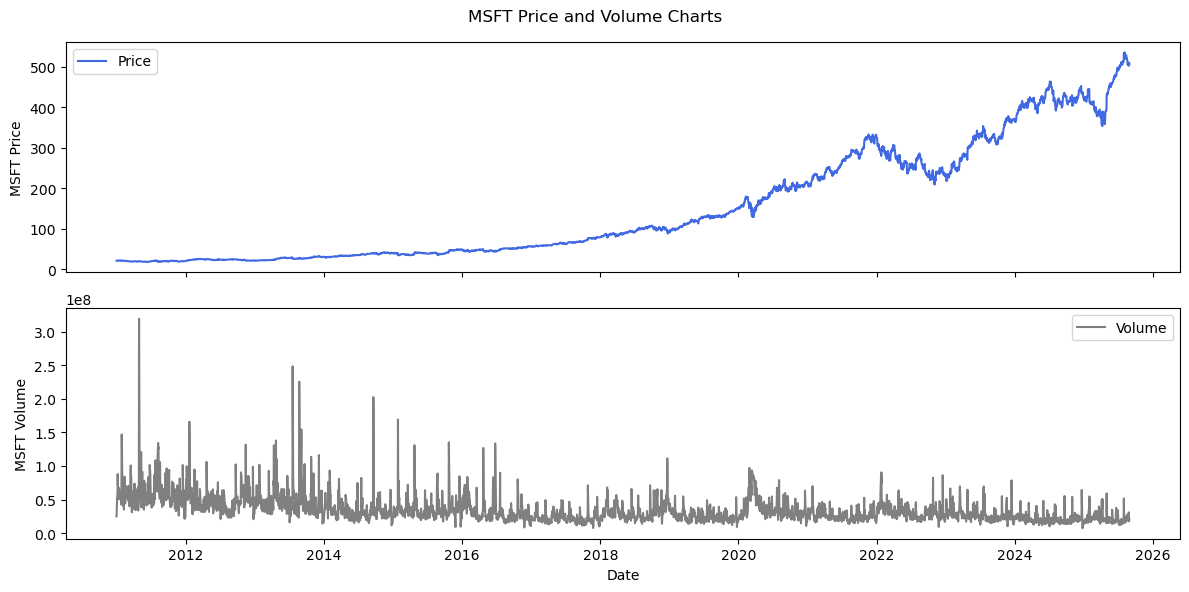

In [15]:
# Plot
fig, axs = plt.subplots(2, figsize=(12, 6), sharex=True)
fig.suptitle(f"{ticker} Price and Volume Charts")
axs[0].plot(df.index, df["Close"], label="Price", color="royalblue")
axs[0].set_ylabel("MSFT Price")
axs[0].legend()
axs[1].plot(df.index, df["Volume"], label="Volume", color="gray")
axs[1].set_ylabel("MSFT Volume")
axs[1].legend()
plt.xlabel("Date")
plt.tight_layout()
plt.show()

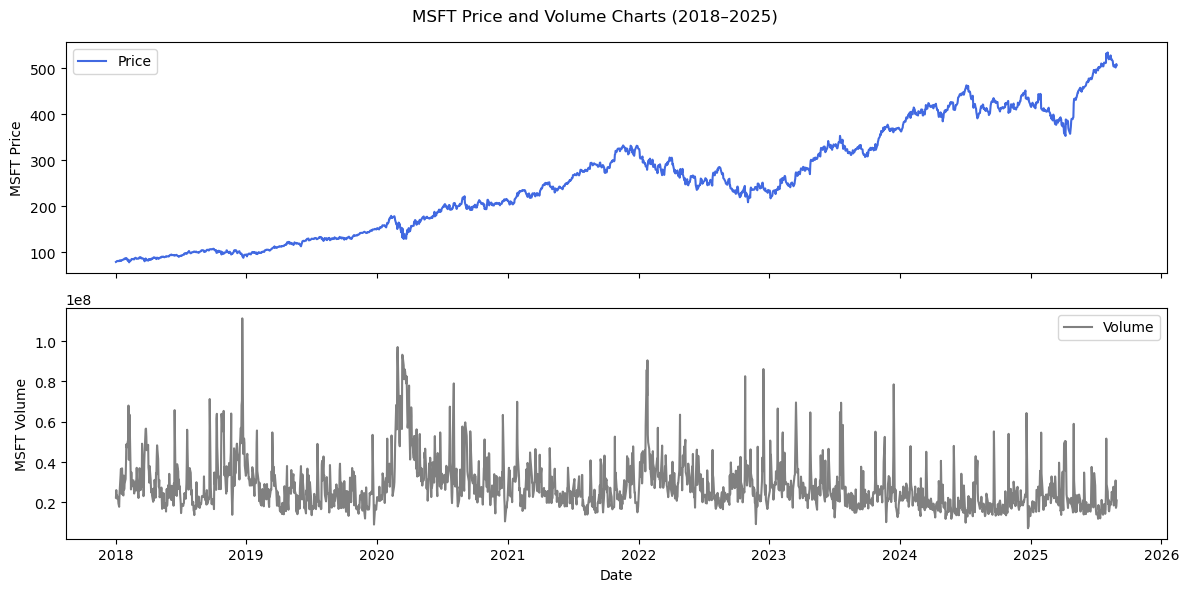

In [16]:
# Filter data from 2018 onwards
df_filtered = df[df.index >= "2018-01-01"]

# Plot price and volume
fig, axs = plt.subplots(2, figsize=(12, 6), sharex=True)
fig.suptitle(f"{ticker} Price and Volume Charts (2018–2025)")
axs[0].plot(df_filtered.index, df_filtered["Close"], label="Price", color="royalblue")
axs[0].set_ylabel("MSFT Price")
axs[0].legend()
axs[1].plot(df_filtered.index, df_filtered["Volume"], label="Volume", color="gray")
axs[1].set_ylabel("MSFT Volume")
axs[1].legend()
plt.xlabel("Date")
plt.tight_layout()
plt.show()

C:\Users\bell\AppData\Local\Temp\ipykernel_28196\2950813354.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download("^VIX", start="2018-01-01", end="2025-02-28")
[*********************100%***********************]  1 of 1 completed


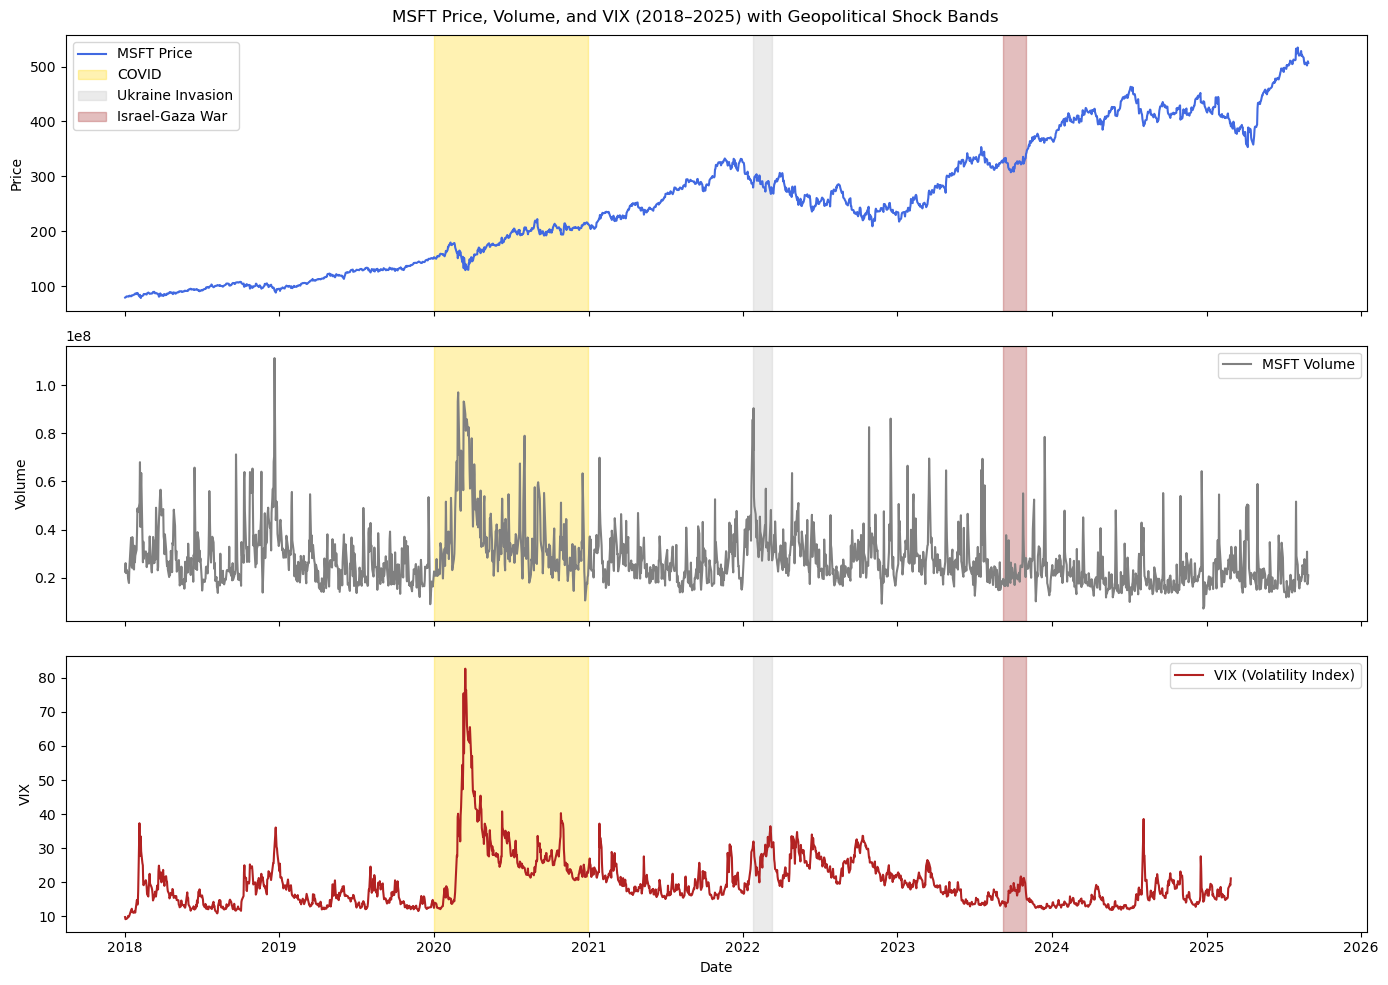

In [17]:
event_bands = [
    ("2020-01-01", "2021-01-01", "COVID"),
    ("2022-01-24", "2022-03-10", "Ukraine Invasion"),
    ("2023-09-07", "2023-11-01", "Israel-Gaza War"),
]

# Download VIX (CBOE volatility index)
vix = yf.download("^VIX", start="2018-01-01", end="2025-02-28")

# Plot MSFT price, volume, and VIX
fig, axs = plt.subplots(3, figsize=(14, 10), sharex=True)
fig.suptitle("MSFT Price, Volume, and VIX (2018–2025) with Geopolitical Shock Bands")

# Price plot
axs[0].plot(
    df_filtered.index, df_filtered["Close"], label="MSFT Price", color="royalblue"
)
axs[0].set_ylabel("Price")
axs[0].legend()

# Volume plot
axs[1].plot(df_filtered.index, df_filtered["Volume"], label="MSFT Volume", color="gray")
axs[1].set_ylabel("Volume")
axs[1].legend()

# VIX plot
axs[2].plot(vix.index, vix["Close"], label="VIX (Volatility Index)", color="firebrick")
axs[2].set_ylabel("VIX")
axs[2].legend()
axs[2].set_xlabel("Date")

# Highlight events with distinct colors
colorv = ["gold", "silver", "brown"]
for i, (start, end, label) in enumerate(event_bands):
    for ax in axs:
        ax.axvspan(
            pd.to_datetime(start),
            pd.to_datetime(end),
            color=colorv[i % len(colorv)],
            alpha=0.3,
            label=label,
        )

# Remove duplicate labels in legend
handles, labels = axs[0].get_legend_handles_labels()
unique = dict(zip(labels, handles))
axs[0].legend(unique.values(), unique.keys())

plt.tight_layout()
plt.show()

### Generate Scatter for Volume and Prices

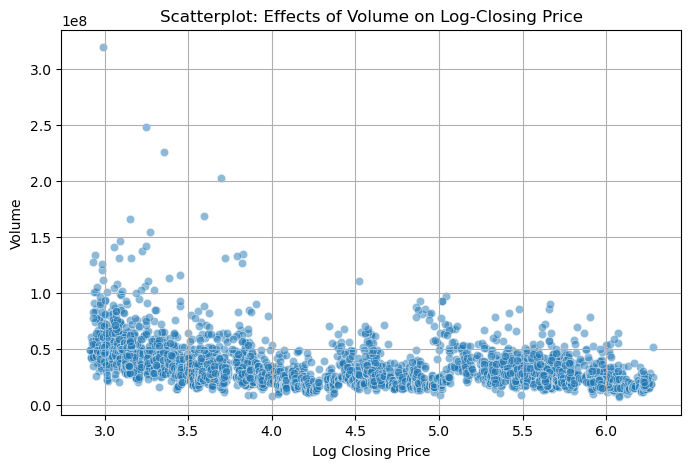

In [18]:
import seaborn as sns

# Scatterplot: Volume vs Log(Price)
plt.figure(figsize=(8, 5))
sns.scatterplot(y=df["Volume"], x=np.log(df["Close"]), alpha=0.5)
plt.title("Scatterplot: Effects of Volume on Log-Closing Price")
plt.ylabel("Volume")
plt.xlabel("Log Closing Price")
plt.grid(True)
plt.show()

In [19]:
correlation = np.corrcoef(df["Volume"], np.log(df["Close"]))[0, 1]
print(f"Correlation between Log(Close) and Volume: {correlation:.2f}")

Correlation between Log(Close) and Volume: -0.44


Text(0.5, 1.0, 'Density Plot - Volume')

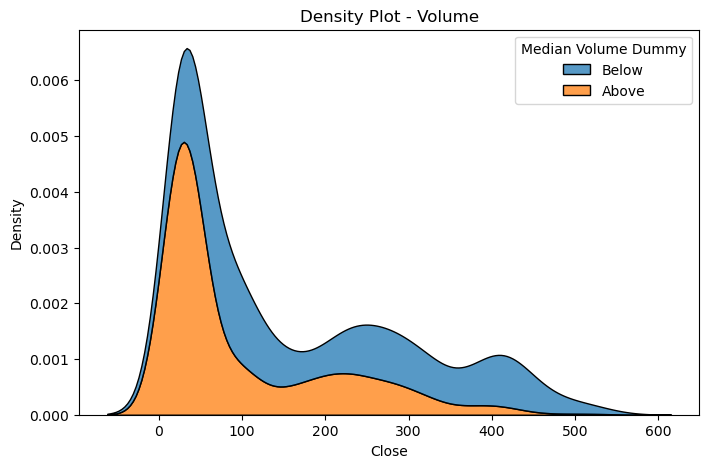

In [20]:
## Volume by below/above Median
# 1. Create a dummy
df["Median Volume Dummy"] = np.where(
    df["Volume"] >= df["Volume"].median(), "Above", "Below"
)
# 2. Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Close", hue="Median Volume Dummy", multiple="stack")
plt.title("Density Plot - Volume")

From this descriptive analysis, how important would you say is the influence of trading volume on stock price?

### Estimate the parameters in the following TLR model:

$log(Close_t) = \beta_0 + \beta_1 Volume_t + \beta_2 trend_t + u_t$  

In [21]:
# Let's create a trend variable
df["trend"] = np.arange(1, len(df) + 1)
df["trend"]

Date
2010-12-31 00:00:00-05:00       1
2011-01-03 00:00:00-05:00       2
2011-01-04 00:00:00-05:00       3
2011-01-05 00:00:00-05:00       4
2011-01-06 00:00:00-05:00       5
                             ... 
2025-08-25 00:00:00-04:00    3684
2025-08-26 00:00:00-04:00    3685
2025-08-27 00:00:00-04:00    3686
2025-08-28 00:00:00-04:00    3687
2025-08-29 00:00:00-04:00    3688
Name: trend, Length: 3688, dtype: int64

In [22]:
# Model
y = np.log(df["Close"])
X = sm.add_constant(df["Volume"])
mdl1 = sm.OLS(y, X).fit()
mdl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     881.7
Date:                Tue, 02 Sep 2025   Prob (F-statistic):          6.62e-174
Time:                        09:57:04   Log-Likelihood:                -5002.1
No. Observations:                3688   AIC:                         1.001e+04
Df Residuals:                    3686   BIC:                         1.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3355      0.032    169.019      0.000       5.274       5.397
Volume     -2.424e-08   8.16e-10    -29.693      0.000   -2.58e-08   -2.26e-08
==============================================================================
Omnibus:                      690.811   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.581
Skew:                           0.225   Prob(JB):                     5.52e-38
Kurtosis:                       2.044   Cond. No.                     7.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conduct t-test statistics

In [23]:
from scipy import stats

coef_volume = mdl1.params["Volume"]
se_volume = mdl1.bse["Volume"]
check_p = mdl1.pvalues.loc["Volume"]

# Compute t-value
t_value = (coef_volume - 0) / se_volume
print(f"t-value: {t_value:.2f}")

# Compute critical value at 0.05 level
alpha = 0.05
cv = stats.t.ppf(1 - alpha, df=mdl1.df_resid)
print(f"Critical Value for {alpha} confidence level: {cv:.2f}")

# Compute pvalue
p = 1 - stats.t.cdf(abs(t_value), df=mdl1.df_resid)
print(f"p-value: {p:.10f}")
print(f"p-value: {check_p:.10f}")

t-value: -29.69
Critical Value for 0.05 confidence level: 1.65
p-value: 0.0000000000
p-value: 0.0000000000


### Confidence Intervals

In [24]:
# 90% confidence interval
conf_int = mdl1.conf_int(alpha=0.10)
print("90% Confidence Interval for volume coefficient:")
print(conf_int)

90% Confidence Interval for volume coefficient:
                   0             1
const   5.283542e+00  5.387416e+00
Volume -2.558627e-08 -2.289968e-08


In [25]:
conf_int.loc["Volume"].items

<bound method Series.items of 0   -2.558627e-08
1   -2.289968e-08
Name: Volume, dtype: float64>

In [26]:
print("CIs for Volume: \n", conf_int.loc["Volume"].values)

CIs for Volume: 
 [-2.55862740e-08 -2.28996824e-08]


**Note:**    
95% of the so computed CIs would contain the true population parameters.

We are 90% confident that the true value of β1, the coefficient for Volume, lies between −2.4e-08 and −2.13e-08. We could also say, with 90% confidence, that an increase of one unit in the Volume is associated with a (%) decrease in the Close price by between the interval values.

NB: if the confidence interval does not include zero, it's telling us that the effect of the covariate is statistically significant at the 90% confidence level.